

Dataset Source: Kaggle <br>
Link: https://www.kaggle.com/datasets/waseemalastal/customer-support-ticket-dataset




**Introduction** <br>
I have been assigned a Business task to study and to make a few predictions based on the dataset of Customer Support tickets as a part of my Data Scientis role in one of firms that provides customer support for a variety of products such as Softwares, Electronic gadgets such as Mobile Phones, Laptops, Television, Washing Machines and more. Supports are provided to customers through Chat, Email, Phone Calls and Social Media. All the issues or problems from the customers are automatically created as support tickets in Company's Customer Supporting Portal: Service-now (Snow). The support analysts will be working on these snow tickets to update all the records of all actions and communication logs until the resolution is confirmed. These snow support tickets will contain the information related to type of the issue, product information, First response time, time for resolution, SLA based on the ticket priority, and Customer details like: Name, Email, Age, Gender. These informations can directly be obtained from Snow portal for a specifed time period. This is mainly used for know the ticket status and to review the annual performance of employees and to evaulvate the customer ratings.

I will be using the same data to work on my projects and to make predictions and in suggesting some of the process improvement initatives.
For this I will be using an EDA pipline in Juptyter Notebook to analyse, preprocess, apply machine learning techniques to the provided dataset.


**Problem Statement**
<br> The given dataset implies that there has been a large number of complaints and requests created by the customers for a number of products. However, a largr number of tickets or requests from the customers remain open or pending actions. Also, there has been no clear idea about the customer satisfaction for a large number of cases closed. Hence, it's not feasible to find the customer satisfaction ratings which signifies the Company Performance. These information are very vital in business improvement and expansion for better customer satisfactions.

<br> The given dataset can be worked on to conduct the studies including the following: <br>

i) Churn predictions - Based on the past records of support tickets, resolution time and customer ratings, we can predict whether the customer would be remained. <br>
ii) Understand the patters and common trends in receiving the requests or problems from customers.<br>
iii) Make a suggestions or develop natural languaege processing models to automatically categorize tickets based on the product, priority, customer. <br>
iv) Predicting CSAT (Customer Satisfaction Rating). <br>
v) Recommend systems for process imporvement or suggesting changes in the workflow for better customer satisfaction and rating. <br>

The provided dataset contains the following features: Ticket information, Customer information, product information, support related informations like response and resolution time and rating from the customers based on their acceptance and satisfaction level with regards to the support received. We will be applying some of the ML techniques to determine the customer satisfaction ratings and compare to find the best and the most apt ML model for given project for customer ticket data.



In [ ]:
#Importing database and reading data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

#Command line to read the csv dataset file
df = pd.read_csv("customer_support_tickets.csv")
df.tail()
#df.head() can also be used to read the data. But here we are using tail function to view the last 5 rows to also know the number of datas.

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,NaN,NaN,NaN
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,NaN,NaN,NaN
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0
8468,8469,Steven Davis MD,lori20@example.net,53,Other,Philips Hue Lights,2020-06-01,Billing inquiry,Hardware issue,There seems to be a hardware problem with my {...,Open,NaN,High,Phone,NaN,NaN,NaN


**Data Exploration** <br>

The dataset for customer support tickets might contain missing values or duplicate values. Missing and duplicate values are determined using the 'isnull' and 'duplicated' functions and filled using 'fillna' functions.

In [ ]:
#Check for null values
null_values = df.isnull().sum()
print(null_values)

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64


In [ ]:
#Finding and updating missing values for features

df['First Response Time'] = pd.to_datetime(df['First Response Time'])
df['First Response Time'] = df['First Response Time'].fillna(df['First Response Time'].median())

df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'])
df['Time to Resolution'] = df['Time to Resolution'].fillna(df['Time to Resolution'].median())

In [ ]:
df['Customer Satisfaction Rating'] = df.groupby('Ticket Priority')['Customer Satisfaction Rating'].transform(lambda x: x.fillna(x.median()))

In [ ]:
df.drop('Resolution', axis=1, inplace=True)

All the null values are now added.

Data Exploration or distribution of some of the features is done using some visualisations.

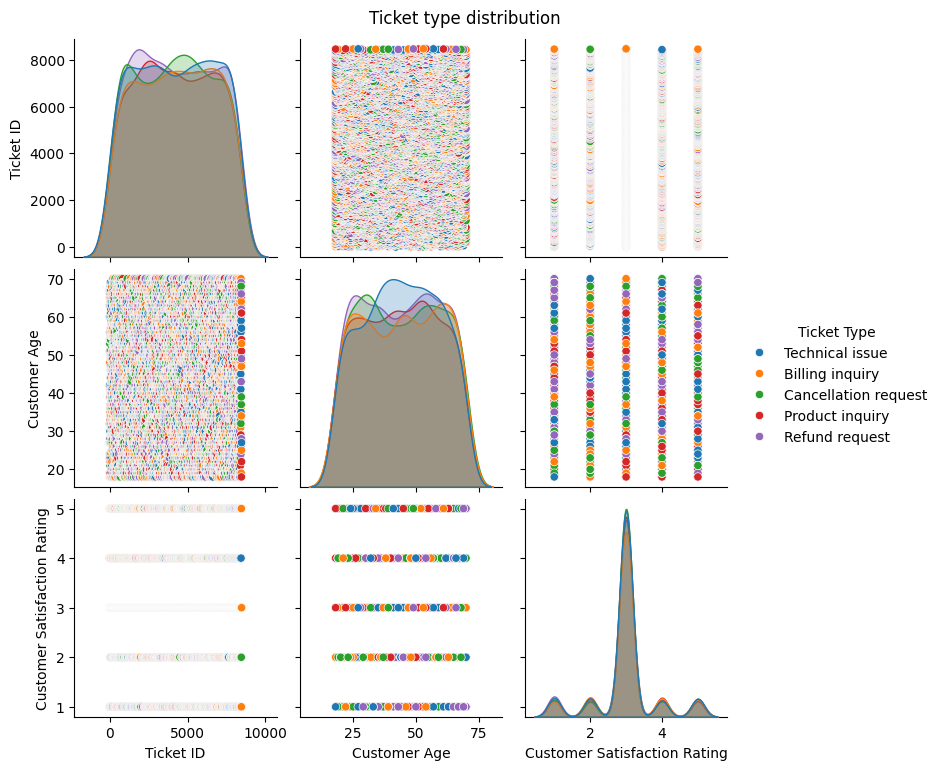

In [ ]:
#Pairplot for the Ticket Type Distribution
sns.pairplot(df, hue='Ticket Type')

plt.suptitle('Ticket type distribution', y=1.02)
plt.show()

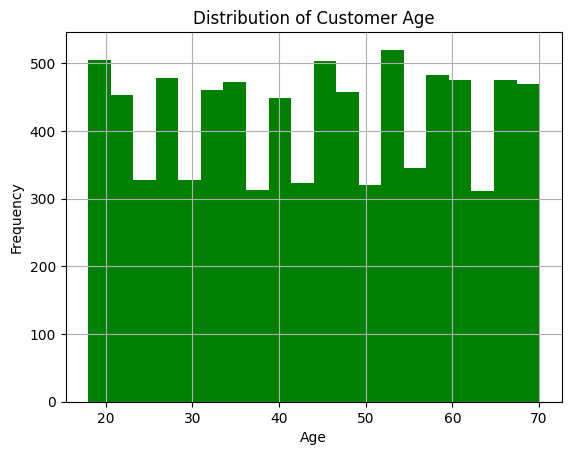

In [ ]:
#Distribution of Customer Age
df['Customer Age'].hist(bins=20, color='green')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

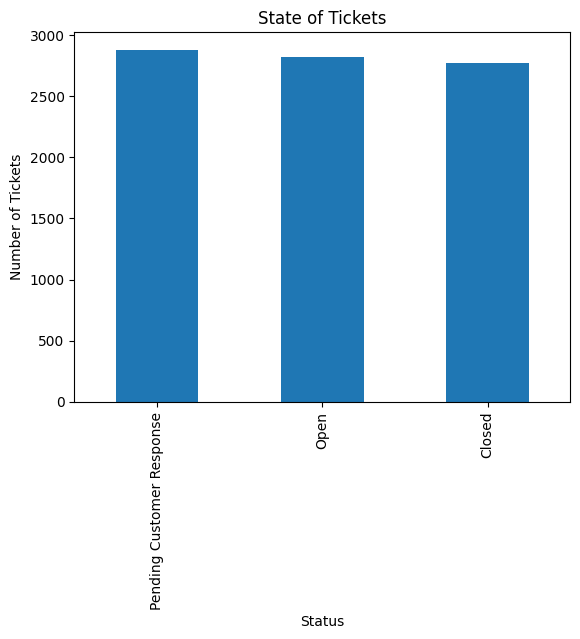

In [ ]:
#Ticket Status Breakdown
df['Ticket Status'].value_counts().plot.bar()
plt.title('State of Tickets')
plt.xlabel('Status')
plt.ylabel('Number of Tickets')
plt.show()

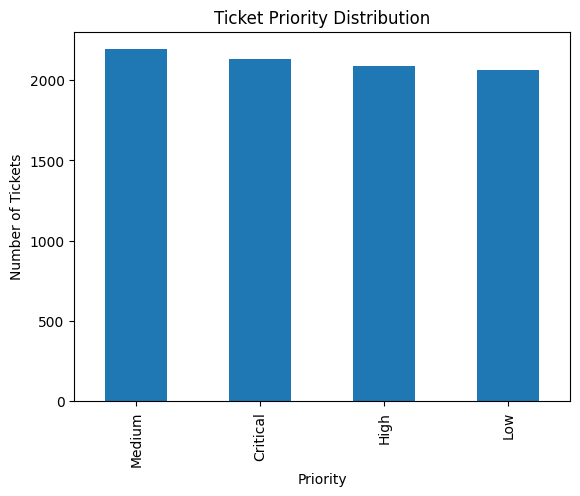

In [ ]:
#Ticket Priority Distribution
df['Ticket Priority'].value_counts().plot.bar()
plt.title('Ticket Priority Distribution')
plt.xlabel('Priority')
plt.ylabel('Number of Tickets')
plt.show()

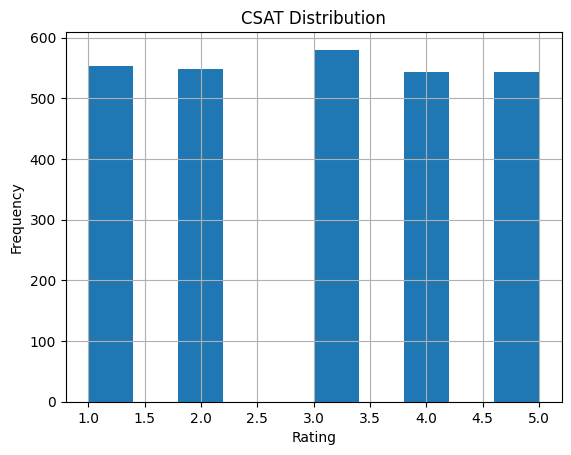

In [ ]:
#CSAT Rating of Customers
df['Customer Satisfaction Rating'].hist(bins=10)
plt.title('CSAT Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

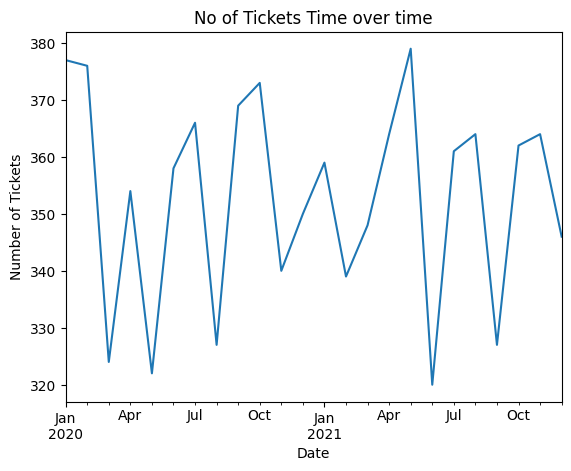

In [ ]:
#Number of tickets over time
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])
df.set_index('Date of Purchase').resample('M').size().plot()
plt.title('No of Tickets Time over time')
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.show()

**Convert Categorical to Numerical values**

In [ ]:
#Convert Categorical values to numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Ticket Type'] = le.fit_transform(df['Ticket Type'])
df['Ticket Status'] = le.fit_transform(df['Ticket Status'])
df['Ticket Channel'] = le.fit_transform(df['Ticket Channel'])
df['Ticket Priority'] = le.fit_transform(df['Ticket Priority'])

**Splitting into Training and Test datasets** <br>


In [ ]:
df_clean = df.dropna(subset=['Customer Satisfaction Rating'])

X = df_clean[['Customer Age', 'Customer Gender', 'Ticket Type', 'Ticket Priority', 'First Response Time']]
y = df_clean['Customer Satisfaction Rating']

X = pd.get_dummies(X, drop_first=True)

for col in X.columns:
  if X[col].dtype == 'datetime64[ns]':
    X[col] = X[col].apply(lambda x: x.toordinal())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((2215, 2732), (554, 2732), (2215,), (554,))

**Model Training**

1) Logistic Regression

In [ ]:
# Logistic Regression
from sklearn.exceptions import ConvergenceWarning
#from sklearn.metrics import UndefinedMetricWarning
import warnings # Added import statement

warnings.filterwarnings("ignore", category=ConvergenceWarning)
#warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluation
log_reg_conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
log_reg_clf_report = classification_report(y_test, y_pred_log_reg, zero_division=1)
log_reg_accuracy = log_reg.score(X_test, y_test)


In [ ]:
print(f"Accuracy of Logistic Regression : {log_reg_accuracy}")
print("Classification Report:\n", log_reg_clf_report)
print("Confusion Matrix:\n", log_reg_conf_matrix)

Accuracy of Logistic Regression : 0.2148014440433213
Classification Report:
               precision    recall  f1-score   support

         1.0       0.17      0.21      0.19       109
         2.0       0.25      0.17      0.20       117
         3.0       0.25      0.35      0.29       112
         4.0       0.22      0.25      0.23       108
         5.0       0.18      0.09      0.12       108

    accuracy                           0.21       554
   macro avg       0.21      0.21      0.21       554
weighted avg       0.21      0.21      0.21       554

Confusion Matrix:
 [[23 21 27 24 14]
 [26 20 32 28 11]
 [32 10 39 20 11]
 [29 14 28 27 10]
 [28 16 29 25 10]]


2) Gradient Boosting

In [ ]:
# Gradient Boosting
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_clf.predict(X_test)

# Evaluation
gb_accuracy = gb_clf.score(X_test, y_test)
gb_clf_report = classification_report(y_test, y_pred_gb, zero_division=1)
gb_conf_matrix = confusion_matrix(y_test, y_pred_gb)

In [ ]:
print(f"Accuracy of Gradient Boosting: {gb_accuracy}")
print("Classification Report:\n", gb_clf_report)
print("Confusion Matrix:\n", gb_conf_matrix)

Accuracy of Gradient Boosting: 0.7284533648170012
Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      0.00      0.00       115
         2.0       1.00      0.00      0.00       109
         3.0       0.73      1.00      0.84      1237
         4.0       0.00      0.00      0.00       126
         5.0       1.00      0.00      0.00       107

    accuracy                           0.73      1694
   macro avg       0.75      0.20      0.17      1694
weighted avg       0.73      0.73      0.62      1694

Confusion Matrix:
 [[   0    0  115    0    0]
 [   0    0  108    1    0]
 [   0    0 1234    3    0]
 [   0    0  126    0    0]
 [   0    0  107    0    0]]


3) K Nearest Neighbour

In [ ]:
# KNN
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_clf.predict(X_test)

# Evaluation
knn_accuracy = knn_clf.score(X_test, y_test)
knn_clf_report = classification_report(y_test, y_pred_knn)
knn_conf_matrix = confusion_matrix(y_test, y_pred_knn)

print(f"Accuracy of KNN: {knn_accuracy}")
print("Classification Report:\n", knn_clf_report)
print("Confusion Matrix:\n", knn_conf_matrix)


Accuracy of KNN: 0.6977567886658795
Classification Report:
               precision    recall  f1-score   support

         1.0       0.06      0.02      0.03       115
         2.0       0.07      0.02      0.03       109
         3.0       0.73      0.95      0.82      1237
         4.0       0.00      0.00      0.00       126
         5.0       0.00      0.00      0.00       107

    accuracy                           0.70      1694
   macro avg       0.17      0.20      0.18      1694
weighted avg       0.54      0.70      0.61      1694

Confusion Matrix:
 [[   2    0  111    0    2]
 [   2    2  105    0    0]
 [  26   21 1178    2   10]
 [   0    2  124    0    0]
 [   2    4  101    0    0]]


**Hyperparameter tuning**

1) Logistic Regression

In [ ]:
# Hyperparameter tuning

param_grid_log_reg = {'C': [0.1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear']}
grid_log_reg = GridSearchCV(LogisticRegression(random_state=42,  max_iter=1000), param_grid_log_reg, cv=5, scoring='accuracy')
grid_log_reg.fit(X_train, y_train)

# Best parameters
print(grid_log_reg.best_params_)

# Best estimator
best_log_reg = grid_log_reg.best_estimator_

# Predicted - comparison
y_pred_log_reg_tuned = best_log_reg.predict(X_test)

{'C': 0.1, 'solver': 'lbfgs'}


Logistic Regression
Accuracy: 0.7302243211334121


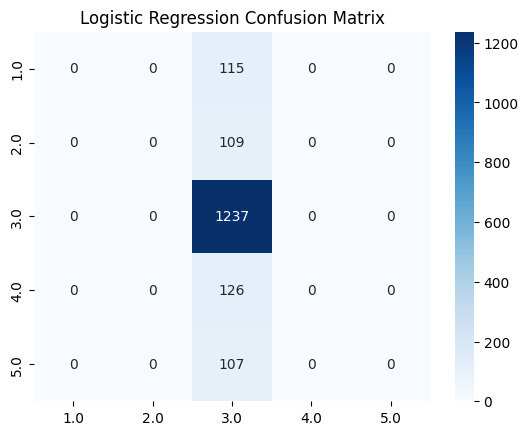

In [ ]:
# Evaluation
print("Logistic Regression")
log_reg_accuracy_t = best_log_reg.score(X_test, y_test)
print("Accuracy:", log_reg_accuracy_t)

# Classification report
# Get the unique class labels from y_test and y_pred_log_reg_tuned
unique_classes = np.unique(np.concatenate((y_test, y_pred_log_reg_tuned)))
unique_classes_str = [str(int(c)) for c in unique_classes] # Convert numeric classes to strings

# Confusion matrices
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg_tuned)
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap="Blues", xticklabels=unique_classes, yticklabels=unique_classes) # Use unique_classes for xticklabels and yticklabels
plt.title("Logistic Regression Confusion Matrix")
plt.show()


2) Gradient Boosting

Best Parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Gradient Boosting
Accuracy: 0.7302243211334121
              precision    recall  f1-score   support

           1       1.00      0.00      0.00       115
           2       1.00      0.00      0.00       109
           3       0.73      1.00      0.84      1237
           4       1.00      0.00      0.00       126
           5       1.00      0.00      0.00       107

    accuracy                           0.73      1694
   macro avg       0.95      0.20      0.17      1694
weighted avg       0.80      0.73      0.62      1694



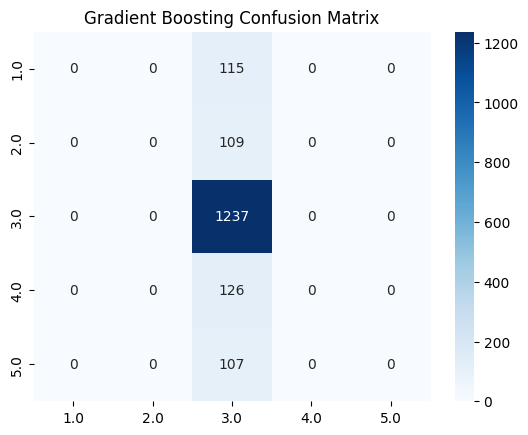

In [ ]:
# Hyperparameter tuning - Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='accuracy')
grid_gb.fit(X_train, y_train)

# Best parameters
print("Best Parameters for Gradient Boosting:", grid_gb.best_params_)

# Best estimator
best_gb = grid_gb.best_estimator_

# Predict with the tuned model
y_pred_gb_tuned = best_gb.predict(X_test)

# Gradient Boosting evaluation
print("Gradient Boosting")
gb_accuracy_t = best_gb.score(X_test, y_test)
print("Accuracy:", gb_accuracy_t)

# Classific reprt
print(classification_report(y_test, y_pred_gb_tuned, zero_division=1, target_names=unique_classes_str))

# Confusion matrex
cm_gb = confusion_matrix(y_test, y_pred_gb_tuned)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap="Blues", xticklabels=unique_classes, yticklabels=unique_classes)
plt.title("Gradient Boosting Confusion Matrix")
plt.show()


3) K Nearest Neighbour

Best Parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
KNN
Accuracy: 0.7266824085005903
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       115
           2       0.00      0.00      0.00       109
           3       0.73      1.00      0.84      1237
           4       1.00      0.00      0.00       126
           5       0.00      0.00      0.00       107

    accuracy                           0.73      1694
   macro avg       0.35      0.20      0.17      1694
weighted avg       0.61      0.73      0.61      1694



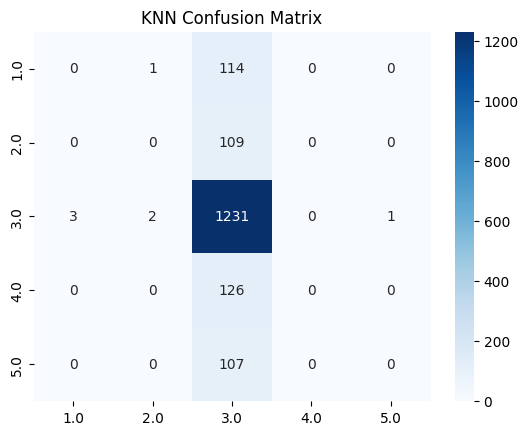

In [ ]:
# Hyperparameter tuning - KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

# Best parameters
print("Best Parameters for KNN:", grid_knn.best_params_)

# Best estimator
best_knn = grid_knn.best_estimator_

# Predict with the tuned model
y_pred_knn_tuned = best_knn.predict(X_test)

# KNN evaluation
print("KNN")
knn_accuracy_t = best_knn.score(X_test, y_test)
print("Accuracy:", knn_accuracy_t)

# Report - Class.
print(classification_report(y_test, y_pred_knn_tuned, zero_division=1, target_names=unique_classes_str))

#Plotting the Confusion Mateix
cm_knn = confusion_matrix(y_test, y_pred_knn_tuned)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap="Blues", xticklabels=unique_classes, yticklabels=unique_classes)
plt.title("KNN Confusion Matrix")
plt.show()


**Comparison of Accuracies of different Models**

In [ ]:
from prettytable import PrettyTable

models = ['Logistic Regression', 'Gradient Boosting', 'KNN']
accuracies_before_tun = [log_reg_accuracy, gb_accuracy, knn_accuracy]
accuracies_after_tun = [log_reg_accuracy_t, gb_accuracy_t, knn_accuracy_t]

df = pd.DataFrame({
    'Model': models,
    'Accuracy Before Tuning': accuracies_before_tun,
    'Accuracy After Tuning': accuracies_after_tun
})

#Creating table
table = PrettyTable()
table.field_names = ["Model", "Accuracy Before Tuning", "Accuracy After Tuning"]

table.add_row(["Logistic Regression", f"{log_reg_accuracy:.4f}", f"{log_reg_accuracy_t:.4f}"])
table.add_row(["Gradient Boosting", f"{gb_accuracy:.4f}", f"{gb_accuracy_t:.4f}"])
table.add_row(["KNN Classifier", f"{knn_accuracy:.4f}", f"{knn_accuracy_t:.4f}"])

print(table)

+---------------------+------------------------+-----------------------+
|        Model        | Accuracy Before Tuning | Accuracy After Tuning |
+---------------------+------------------------+-----------------------+
| Logistic Regression |         0.7302         |         0.7302        |
|  Gradient Boosting  |         0.7285         |         0.7302        |
|    KNN Classifier   |         0.6978         |         0.7267        |
+---------------------+------------------------+-----------------------+


**Conculsion**
<br>

We have applied machine learning techniques: Logistic Regression, Gradient Boosting and KNN Classifer to our given Dataset for Customer Support tickets. In addition we also determined the accuracy rates of these models on our dataset before and after finding the hyperparameter tuning. Based our results we make the following conclusions for each of the Models.

<br> 1) Logistic Regression - Accuracy before and after tuning is 0.7302. From this we can conclude that there is no improvement in accuracy and model is already optimized and the parameters tuned did not affect performance.
<br> 2) Gradient Boosting - Accuracy before tuning is 0.7285 and after tuning is 0.7302, which is a slight increase. This implies that the hyperparamter had a slight positive impact on model's performance.
<br> 3) K nearest neighbour classifer - Accuracy before tuning is 0.6978 and after tuning is 0.7267. This signifies that model is senstitive to hyperparamter settings and tuning helped in model performance.

Linear Regression and Gradient Boosting had identical accuracies, which signifies that both the models capture underlying patterns in data similarity. Although, the accuracy of KNN was also similar, it is low compared to Logistic Regression and Gradient Boosting. Normally Gradient Boosting would outperform Linear Models on complex non linear data, but identical results imply data doesn't contain significant non linear pattern.<br>

KNN performance is found to be of good performance due to non parametric model, which means it doens't assume any specific form for underlying data distribution. KNN is also sensitive to local structures - it is good at capturing local patterns in the data. It performs well in datasets where decision boundary is not stricly linear when dataset contains well defined clustures or neighbours of datapoints.

However, KNN could experience some limitations. KNN is basically performs very slow and it doesn't make predictions during the training phase. Also, it consumes a lot of memory, especially with large datasets. KNN is based on choice of hyperparameter k. For smallers values of k, there could be problems of overfitting, where models is highly sensitive to all points, including the noise. On the other hand, large values of k can lead to underfitting, where the model smooths over data and might miss some important patterns. Hence, finding an ideal value for k can be challenging.

To summarize, KNN can be the best model to determine the customer satisfaction ratings which can be beneficial for company's business process improvement and in enhancing the customer satisfaction.

